In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

# **Imported all libraries and now importing the dataset from the web using its url and now as it is not having the header row attached, we are adding header rows then loading it in a dataframe**


In [3]:


# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + ['radius1', 'texture1', 'perimeter1', 'area1',
                                 'smoothness1', 'compactness1', 'concavity1',
                                 'concave_points1', 'symmetry1', 'fractal_dimension1',
                                 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
                                 'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
                                 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
                                 'area3', 'smoothness3', 'compactness3', 'concavity3',
                                 'concave_points3', 'symmetry3', 'fractal_dimension3']
data = pd.read_csv(url, header=None, names=columns)

# Show the first few rows
print(data.head())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

# checking the first five rows

In [5]:
data.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# checking the last 10 rows

In [7]:
data.tail(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


# checking the shape

In [9]:
data.shape

(569, 32)

# Checking the distribution of Benign and Malignant

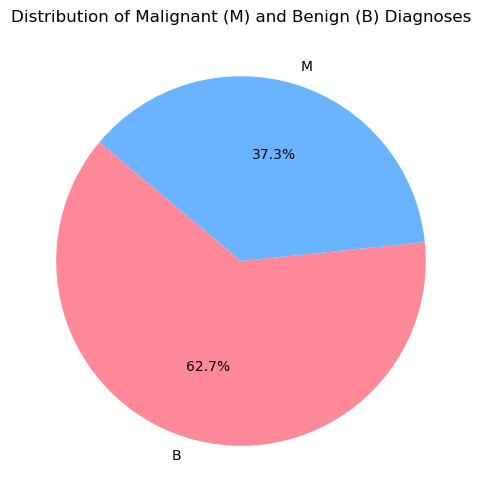

In [11]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

# checking the Info of each variables 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

# 5 point Summary of the Data

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Created a function so that the number of outliers in each columns could be found in a single go

In [17]:
# Replace 'age' with the desired column name
def outlier_test(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Identify outliers
    outliers = data_frame[(data[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)]
 
    # Get the number of outliers
    num_outliers = len(outliers)
 
    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column_name}': {num_outliers}")

## Passing the names of all the columns as string

In [19]:
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    outlier_test(i,data)

Number of outliers for 'ID': 81
Number of outliers for 'radius1': 14
Number of outliers for 'texture1': 7
Number of outliers for 'perimeter1': 13
Number of outliers for 'area1': 25
Number of outliers for 'smoothness1': 6
Number of outliers for 'compactness1': 16
Number of outliers for 'concavity1': 18
Number of outliers for 'concave_points1': 10
Number of outliers for 'symmetry1': 15
Number of outliers for 'fractal_dimension1': 15
Number of outliers for 'radius2': 38
Number of outliers for 'texture2': 20
Number of outliers for 'perimeter2': 38
Number of outliers for 'area2': 65
Number of outliers for 'smoothness2': 30
Number of outliers for 'compactness2': 28
Number of outliers for 'concavity2': 22
Number of outliers for 'concave_points2': 19
Number of outliers for 'symmetry2': 27
Number of outliers for 'fractal_dimension2': 28
Number of outliers for 'radius3': 17
Number of outliers for 'texture3': 5
Number of outliers for 'perimeter3': 15
Number of outliers for 'area3': 35
Number of o

## Created a function so that the distribution of each columns could be found in a single go


In [21]:
def histplot_test(val):
    sns.histplot(data[val],bins=10,kde=True)
    plt.xlabel("value")
    plt.ylabel("Freequency")
    plt.title(f"histogram of {val}")
    plt.show()

### Passing the names of all the columns as string

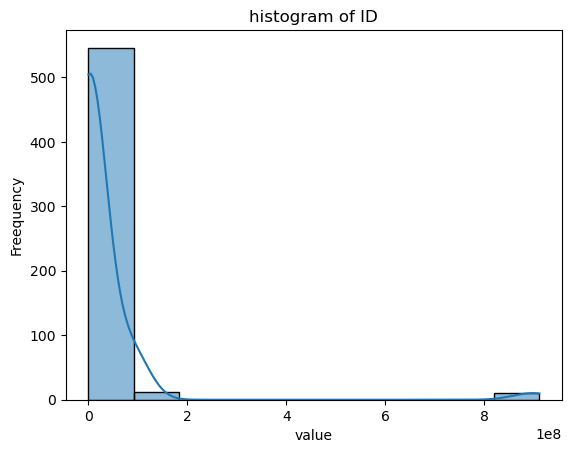

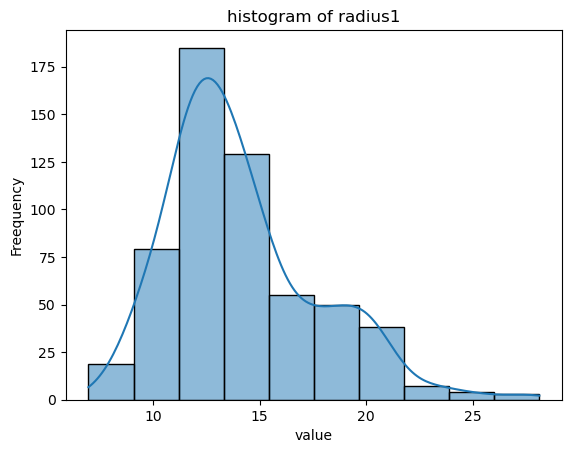

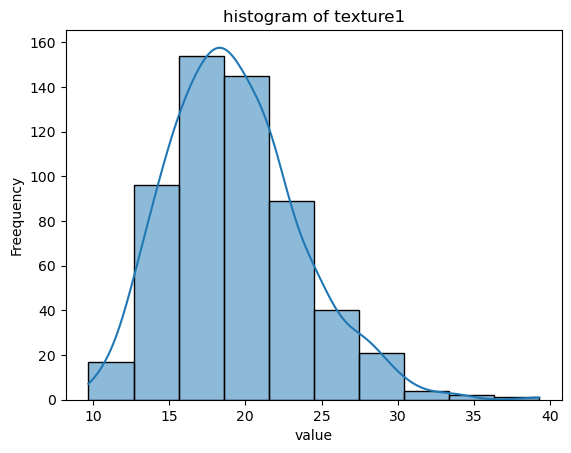

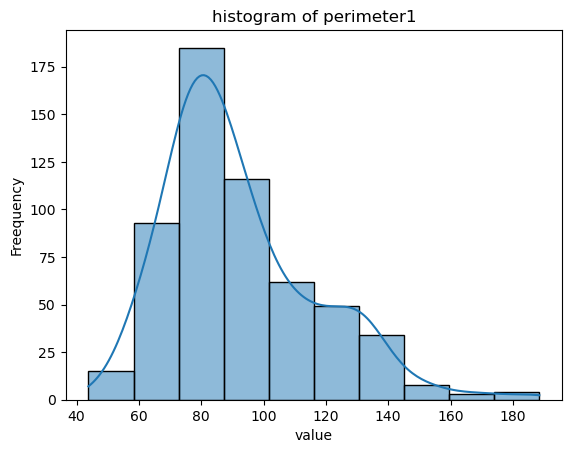

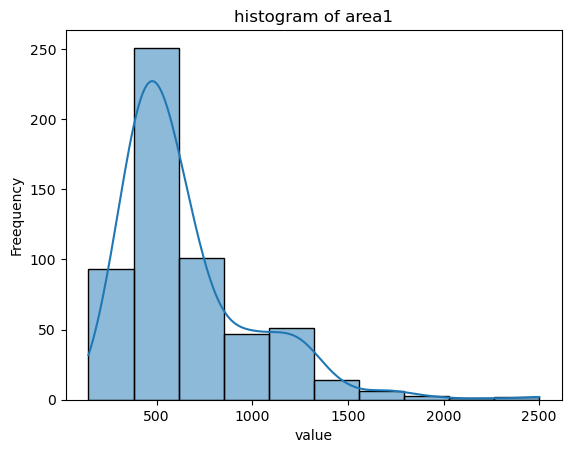

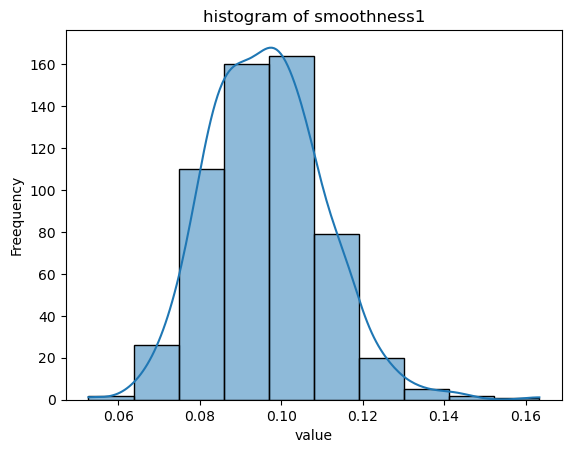

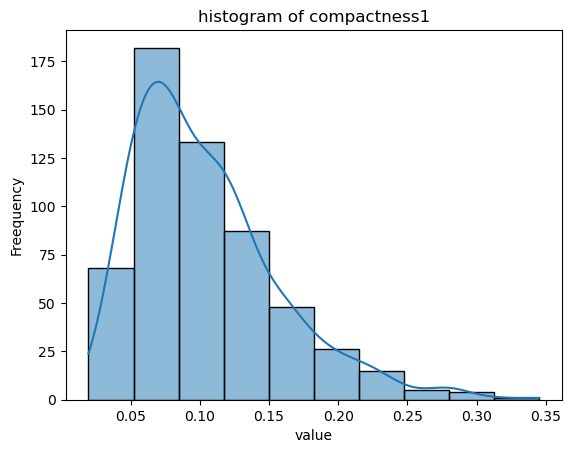

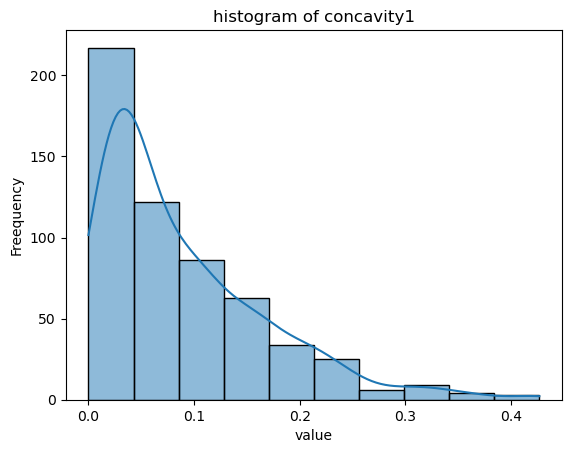

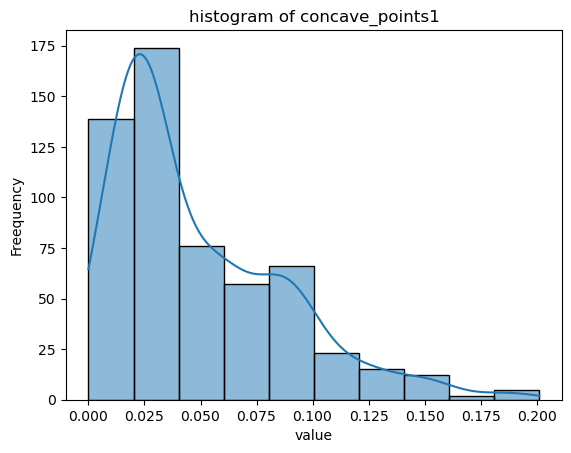

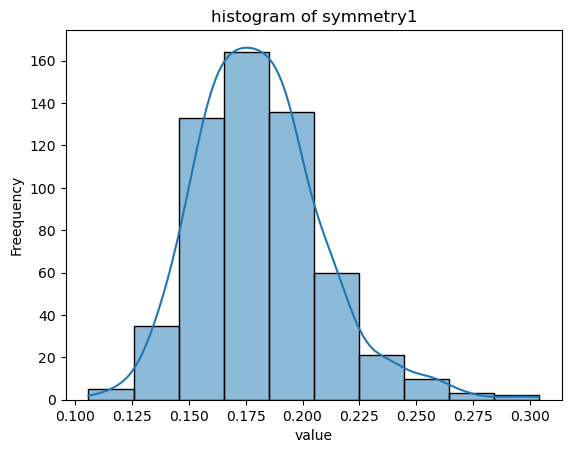

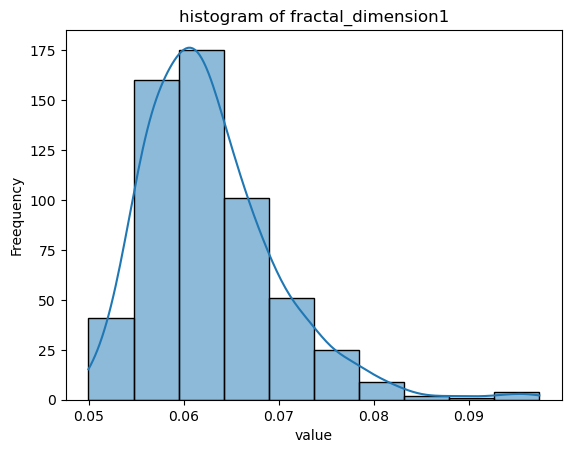

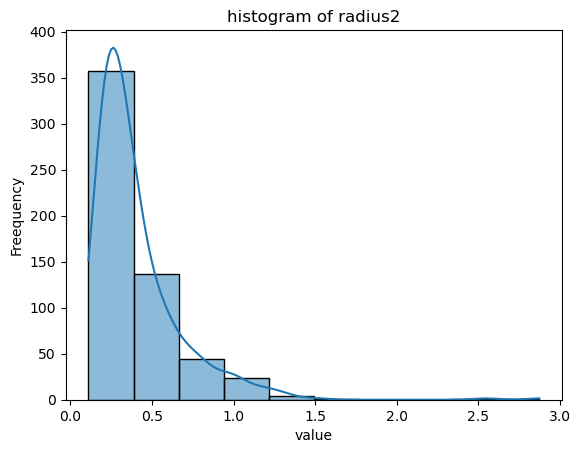

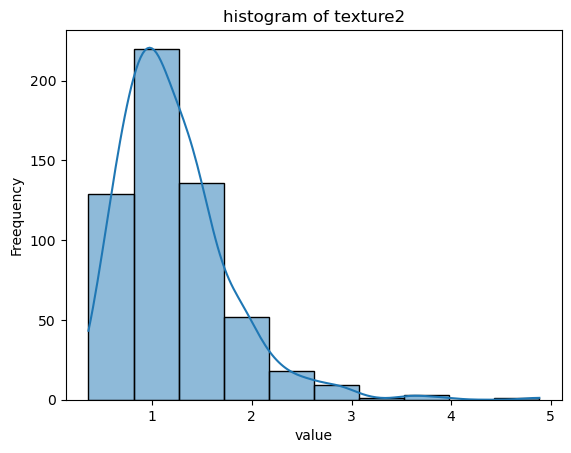

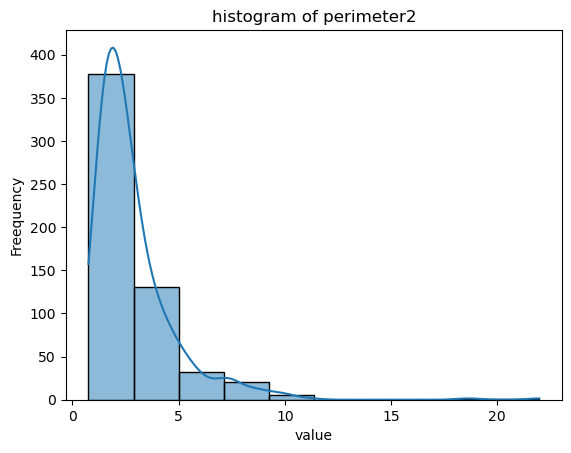

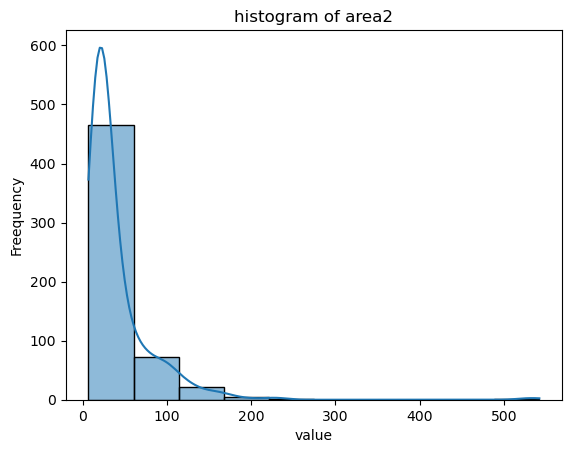

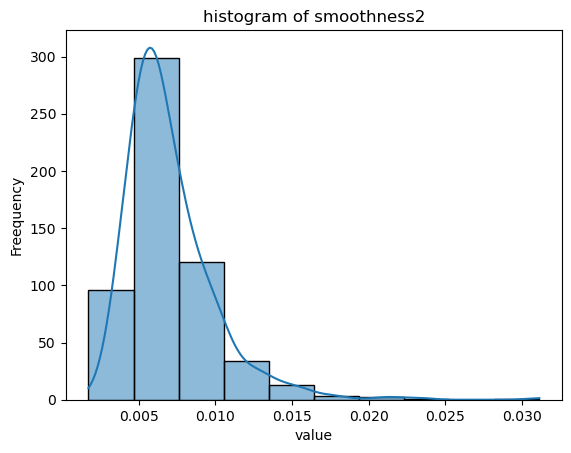

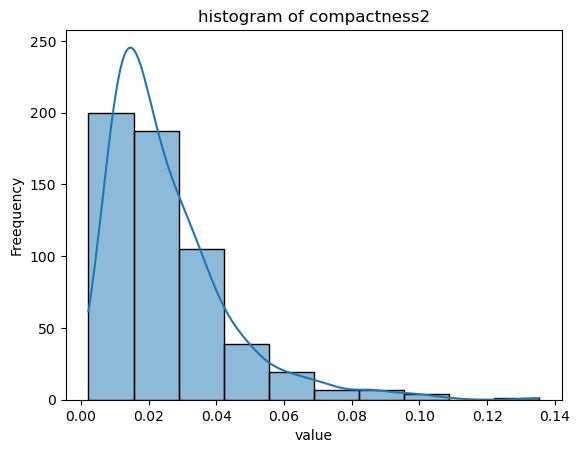

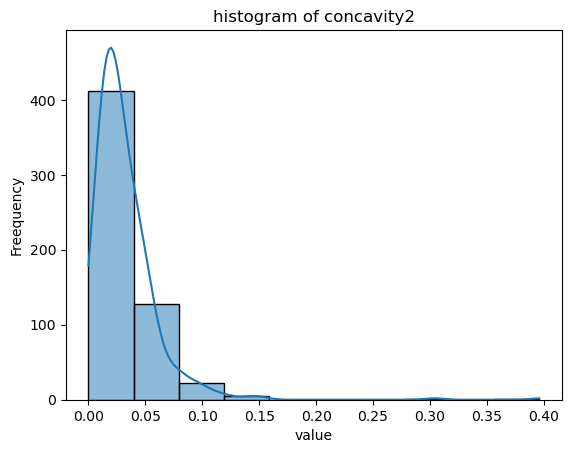

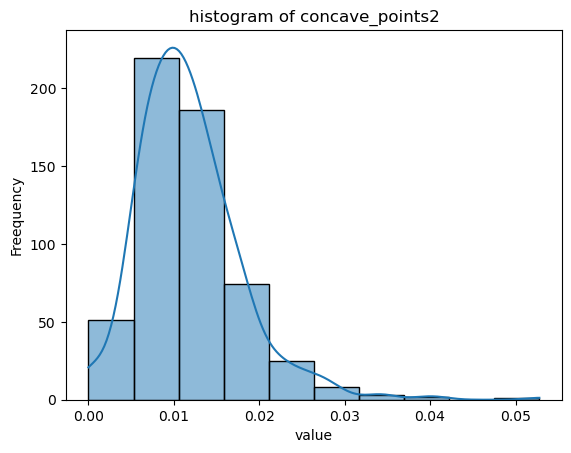

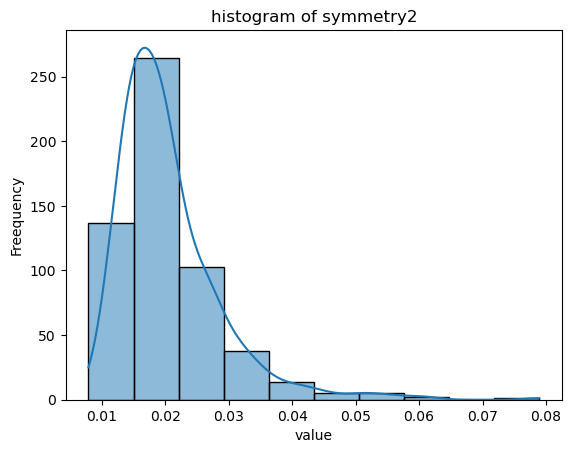

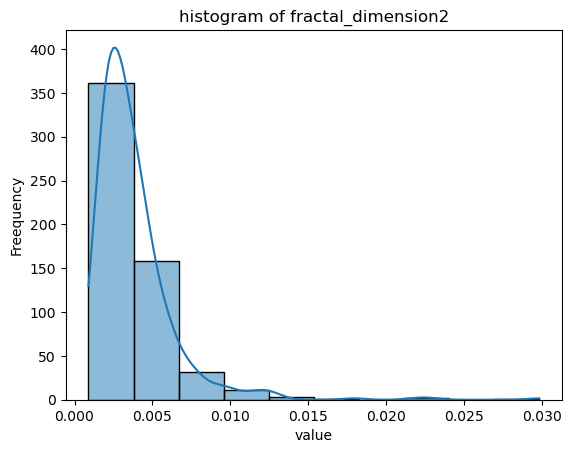

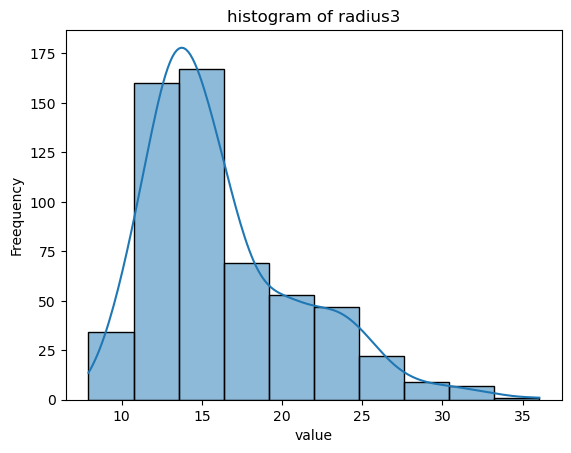

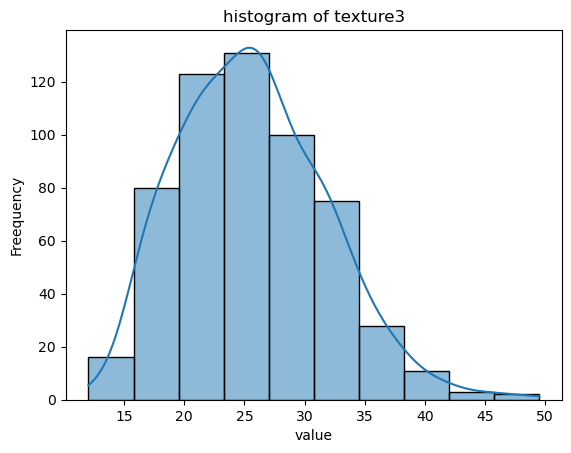

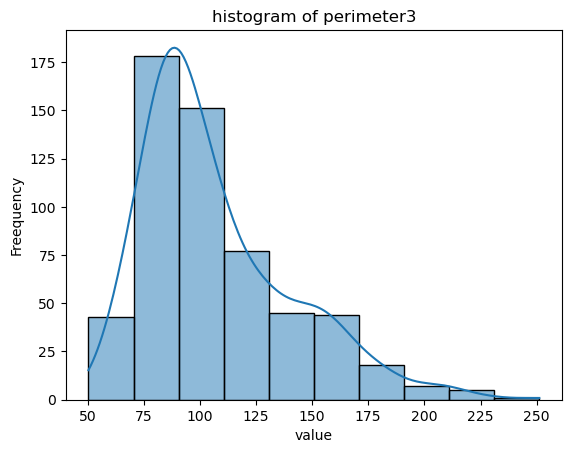

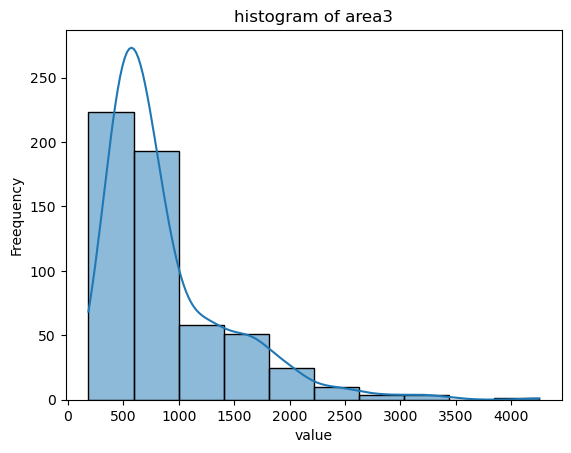

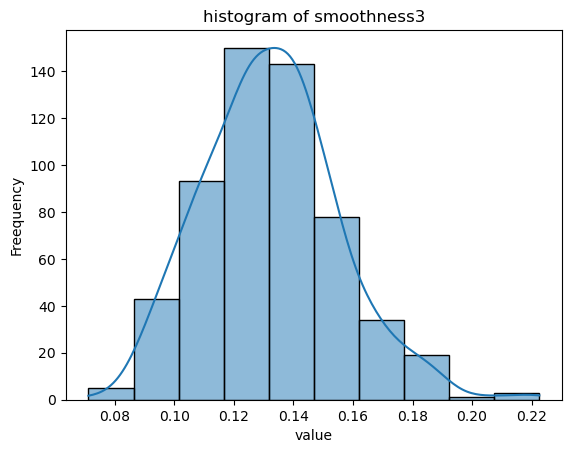

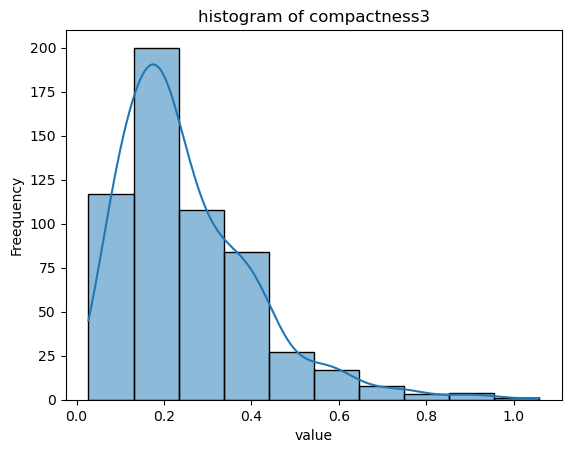

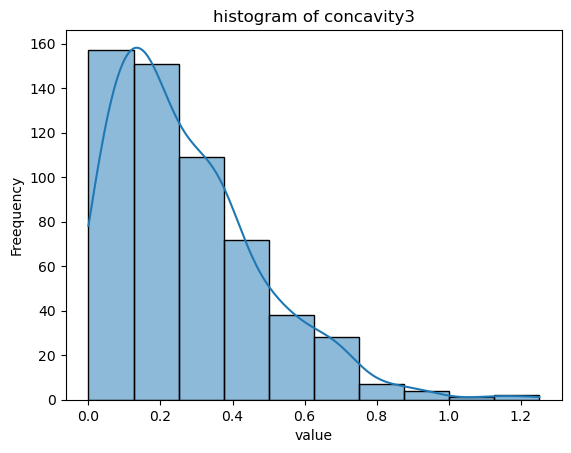

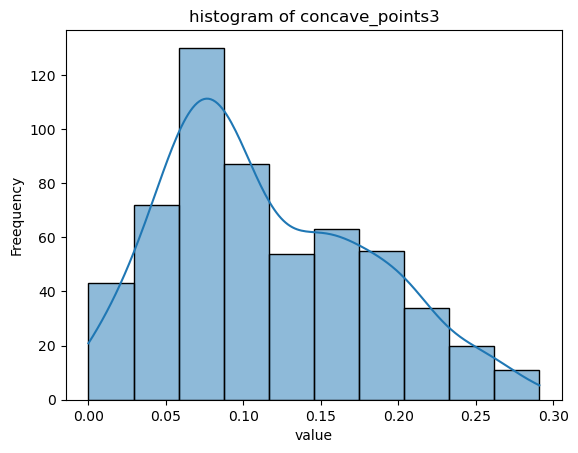

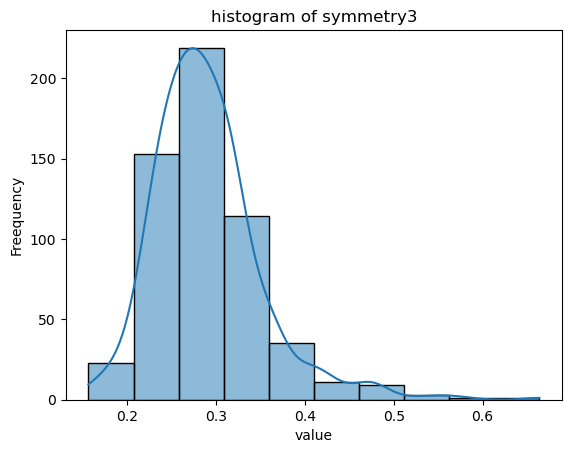

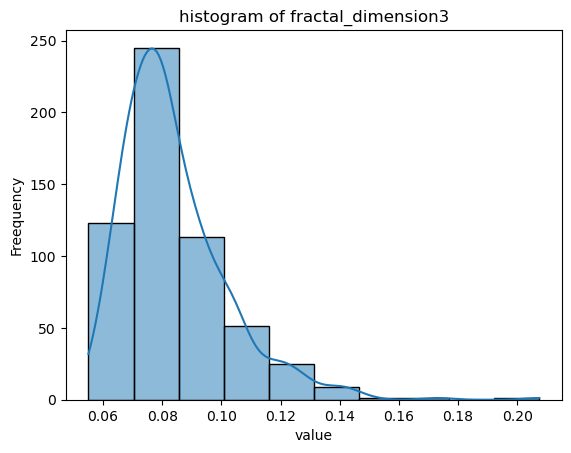

In [23]:
for i in data.select_dtypes(include=['float64','int64']):
    histplot_test(i)

### the distribution is either right skewed or near normal, in these cases standered scaler will do good

# checking duplicated values

In [26]:
data.duplicated().sum()


0

# checking null values

In [28]:
data.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

# Droping the Id Column as it is Prima facia makes no sense to be added

In [30]:
data.drop('ID', axis=1, inplace=True)

In [31]:
data['Diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

## converting Diagnosis column into two categories(numerical) , Malignant becomes 1 and Benign Becomes 0

In [33]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [34]:
data['Diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

# Keeping the original data, which will be usefull if any kind of reset is neeeded in any further steps
### data_vif is the name used as the next step is feature selection using vif as the matrix for selection

In [36]:
data_vif=data.copy()

# checking the vif, Choosing the appropriate variables for the data, so that we could avoid multicolleniarity

In [38]:
data_vif.columns

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

## Selecting columns
#### the values which are droped will removed from the vif test, and subsequently from the model

In [40]:
data_vif_pass=data_vif.drop(['area1','radius1','area2','radius2','radius3','area3','concavity1','concavity2','concavity3','compactness1','compactness2','perimeter3','concave_points1','concave_points2','concave_points3','fractal_dimension3','fractal_dimension2','texture1','texture3','smoothness3'], axis=1).copy()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example DataFrame (replace with your actual dataset)

# Add constant to the data (intercept term)
X = add_constant(data_vif_pass)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)


               Feature         VIF
0                const  337.743550
1            Diagnosis    3.240835
2           perimeter1    5.290145
3          smoothness1    2.349636
4            symmetry1    2.995382
5   fractal_dimension1    3.821458
6             texture2    1.537587
7           perimeter2    3.104662
8          smoothness2    1.901272
9            symmetry2    2.597828
10        compactness3    3.927063
11           symmetry3    4.749527


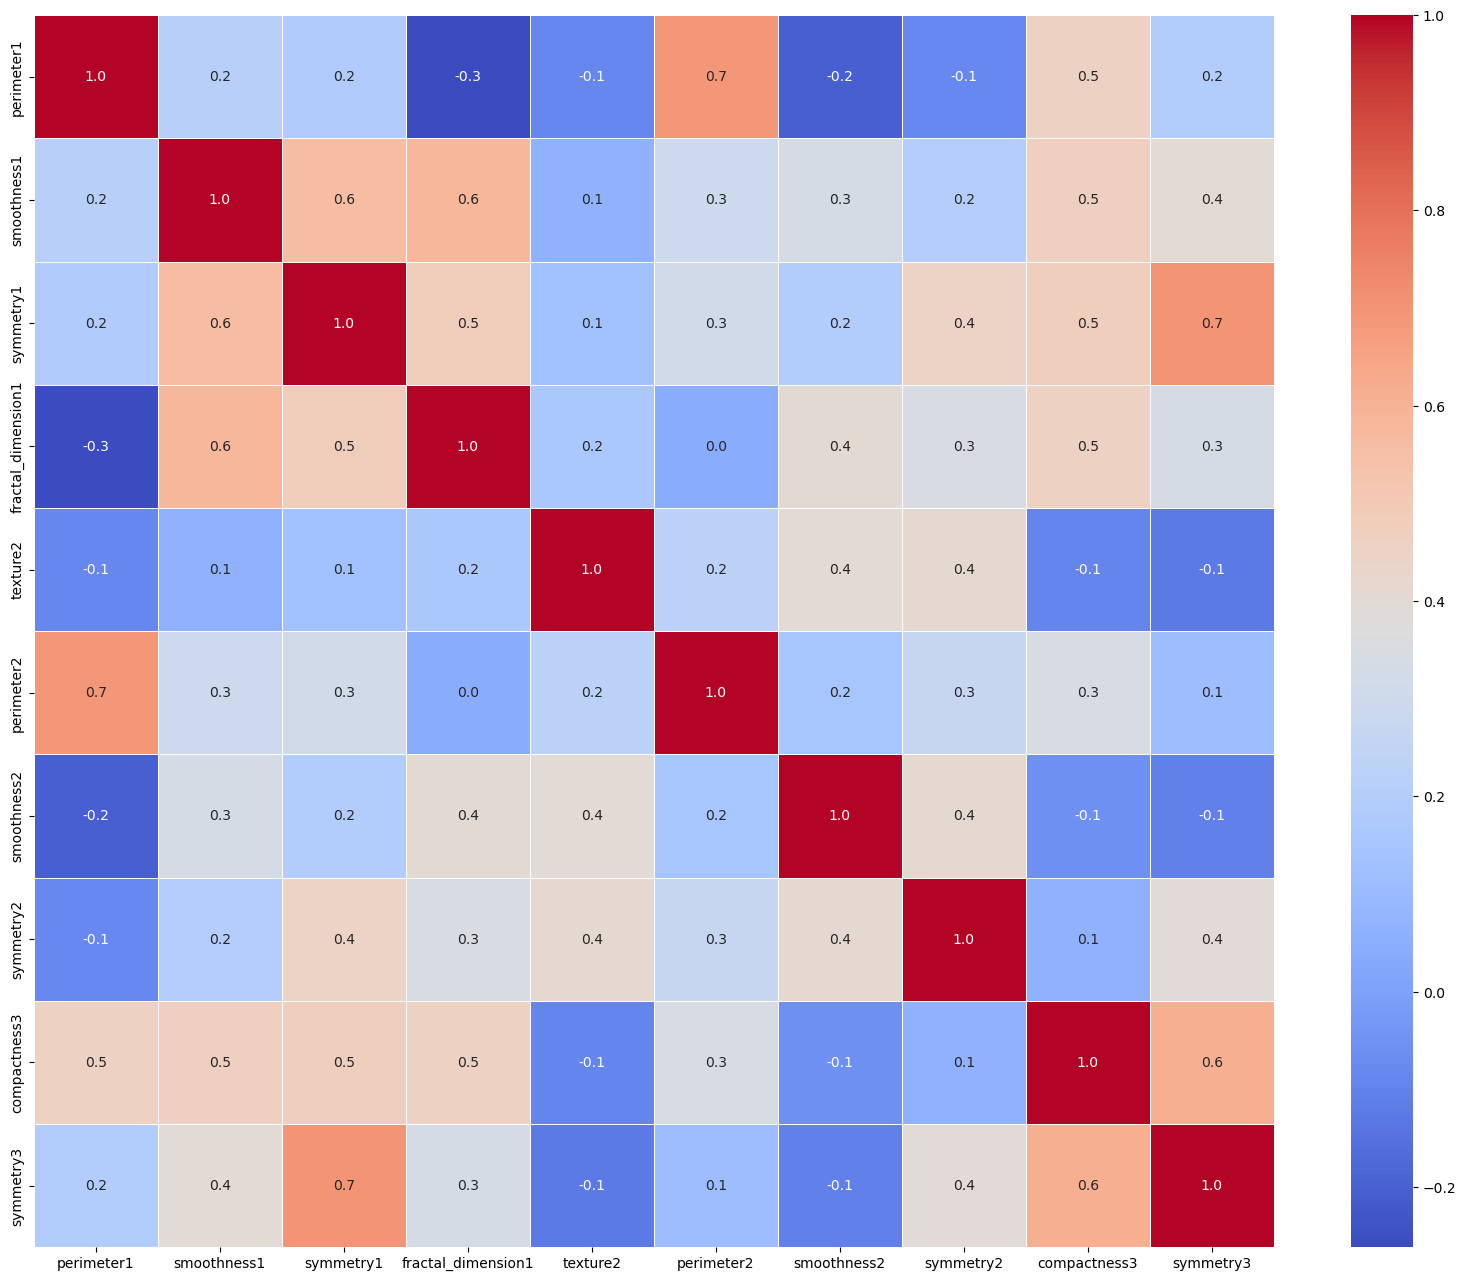

In [42]:
# Assuming 'data_vif_pass' is your DataFrame
plt.figure(figsize=(20, 16))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(data_vif_pass.drop('Diagnosis',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()

### Storing the data after feature selection, which will be used for model building

In [44]:
data_raw=data_vif_pass.copy()

In [45]:
data_raw

,Diagnosis,perimeter1,smoothness1,symmetry1,fractal_dimension1,texture2,perimeter2,smoothness2,symmetry2,compactness3,symmetry3
0,1,122.80,0.11840,0.2419,0.07871,0.9053,8.589,0.006399,0.03003,0.66560,0.4601
1,1,132.90,0.08474,0.1812,0.05667,0.7339,3.398,0.005225,0.01389,0.18660,0.2750
2,1,130.00,0.10960,0.2069,0.05999,0.7869,4.585,0.006150,0.02250,0.42450,0.3613
3,1,77.58,0.14250,0.2597,0.09744,1.1560,3.445,0.009110,0.05963,0.86630,0.6638
4,1,135.10,0.10030,0.1809,0.05883,0.7813,5.438,0.011490,0.01756,0.20500,0.2364
...,...,...,...,...,...,...,...,...,...,...,...
564,1,142.00,0.11100,0.1726,0.05623,1.2560,7.673,0.010300,0.01114,0.21130,0.2060
565,1,131.20,0.09780,0.1752,0.05533,2.4630,5.203,0.005769,0.01898,0.19220,0.2572
566,1,108.30,0.08455,0.1590,0.05648,1.0750,3.425,0.005903,0.01318,0.30940,0.2218
567,1,140.10,0.11780,0.2397,0.07016,1.5950,5.772,0.006522,0.02324,0.86810,0.4087


# creating four versions of the code so that we could compare the 4 versions(outlier smoothed and raw)x(with or without smote)
### the smote vesrion here is a data copy for the smote activity, it wont be directly used, a new variable will be defined after applying smote and that dataframe will be passed to build the model. Similarly for Smoothed data

In [47]:
data_raw_final=data_raw.copy()
data_smoothed=data_raw.copy()
data_smote=data_raw.copy()

# creating a new function so that we can transfer any data anytime which has to be smoothed

In [49]:
def outlier_smooth(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calculate the median of the column
    median_value = data_frame[column_name].median()
 
    # Identify outliers
    outliers = (data_frame[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)
    data_frame.loc[outliers, column_name] = median_value

    # Print if any changes were made
    if outliers.any():
        print(f"{column_name} changed")
    # Get the number of outliers
    #num_outliers = len(outliers)
 
    # Display the number of outliers for the specified column
    #print(f"Number of outliers for '{column_name}': {num_outliers}")

### smoothing the raw data

In [51]:
for i in data_smoothed.drop('Diagnosis',axis = 1).columns:
    outlier_smooth(i,data_smoothed)

perimeter1 changed
smoothness1 changed
symmetry1 changed
fractal_dimension1 changed
texture2 changed
perimeter2 changed
smoothness2 changed
symmetry2 changed
compactness3 changed
symmetry3 changed


#### Checking the number of outliers of the smoothed data

In [53]:
data_smoothed.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.00000,1.000000,1.00000
perimeter1,569.0,90.144288,21.405756,43.790000,75.170000,86.24000,102.400000,147.30000
smoothness1,569.0,0.096000,0.013126,0.062510,0.086410,0.09587,0.104900,0.13350
symmetry1,569.0,0.179200,0.023715,0.116700,0.162000,0.17920,0.194300,0.24590
fractal_dimension1,569.0,0.062151,0.005842,0.049960,0.057700,0.06154,0.065690,0.07871
texture2,569.0,1.151444,0.424286,0.360200,0.833900,1.10800,1.410000,2.42600
perimeter2,569.0,2.452209,1.094063,0.757000,1.606000,2.28700,2.974000,5.86500
smoothness2,569.0,0.006547,0.001994,0.001713,0.005169,0.00638,0.007702,0.01243
symmetry2,569.0,0.019229,0.005529,0.007882,0.015160,0.01873,0.022030,0.03546
compactness3,569.0,0.238212,0.127693,0.027290,0.147200,0.21190,0.315000,0.62470


In [54]:
for i in data_smoothed.drop('Diagnosis',axis = 1).columns:
    outlier_test(i,data_smoothed)

Number of outliers for 'perimeter1': 4
Number of outliers for 'smoothness1': 2
Number of outliers for 'symmetry1': 2
Number of outliers for 'fractal_dimension1': 7
Number of outliers for 'texture2': 5
Number of outliers for 'perimeter2': 21
Number of outliers for 'smoothness2': 9
Number of outliers for 'symmetry2': 14
Number of outliers for 'compactness3': 12
Number of outliers for 'symmetry3': 11


# Using Smote for  unbalanced data
#### for smote to be implemented, it's better not to go to the function we will be defining later for handling smote data as the data splitting is happening inside the function, so implementing it here, so we are doing the smote first and then going to the function

In [56]:
X_smote = data_smote.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y_smote = data_smote['Diagnosis']
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_smote, y_smote)
data_after_smote=pd.concat([X_train_smote, y_train_smote], axis=1)

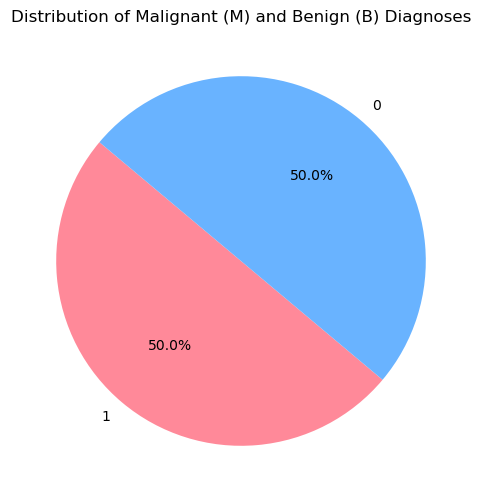

In [57]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data_after_smote['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

### creating two versions after smote so that we can smooth one version of it and keep the other in raw smote form

In [59]:
data_smt=data_after_smote.copy()
data_smt_smooth=data_after_smote.copy()

### Smoothing the smot data so that we can create the second version of smote data, which is smoothed

In [61]:
for i in data_smt_smooth.drop('Diagnosis',axis = 1).columns:
    outlier_smooth(i,data_smt_smooth)

perimeter1 changed
smoothness1 changed
symmetry1 changed
fractal_dimension1 changed
texture2 changed
perimeter2 changed
smoothness2 changed
symmetry2 changed
compactness3 changed
symmetry3 changed


# creating a function to get the analysis, scaling and the other process in a single go, it will help us to compare multiple version of the data with multiplier classifer and will help to choose the right one by reducing manual iterations of code 
## inside the function, datasplitting, data scaling, model fitting, and evaluation will be done and the evaluation report will be done 

In [63]:
models=[]
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('XGboost', xgb.XGBClassifier()))
def model_build(data_inp):
    # Define features and target variable
    X = data_inp.drop('Diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['Diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    for name,model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(f'The classification by {name} model is as follows')
        print(classification_report(y_test,y_pred))
        fpr,tpr,threshold=roc_curve(y_test,y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
        plt.plot(fpr,tpr, label=f'ROC Curve for {name} model', color='blue')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.text(.5,.2,f'AUC for the {name} model is {auc:.2f}')
        plt.title(f'ROC Curve for {name} model')
        plt.legend()
        plt.show()
        
        
    

# Part 1 : Unsmoothen data

Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



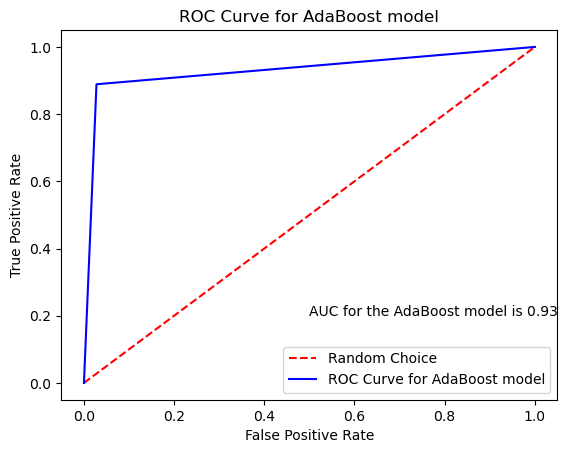

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       108
           1       0.96      0.87      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



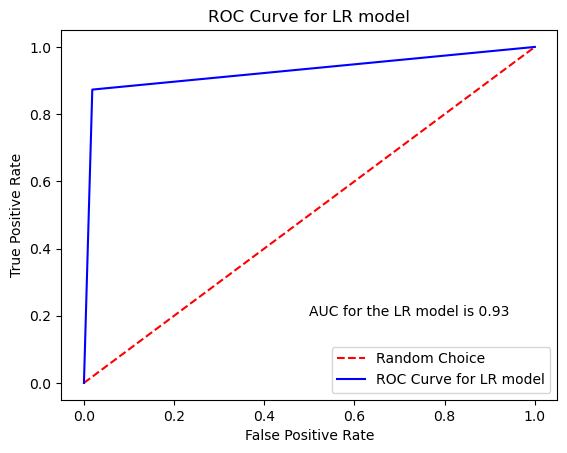

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       108
           1       0.84      0.90      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



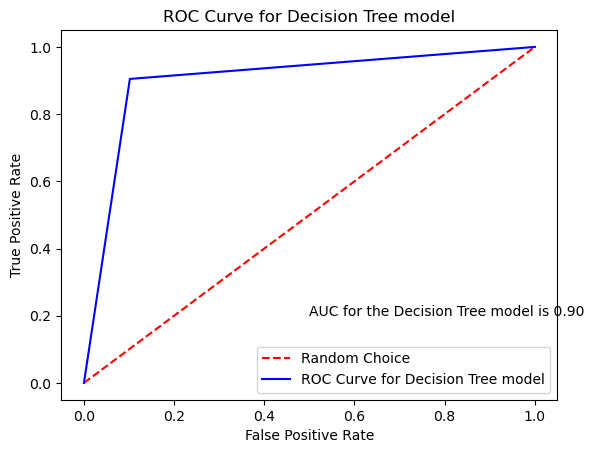

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



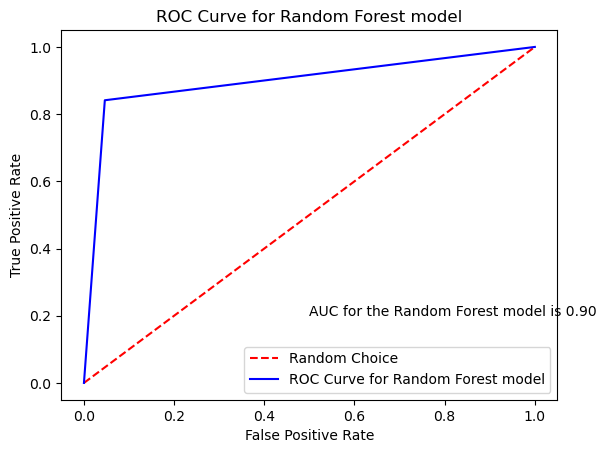

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       108
           1       0.92      0.86      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



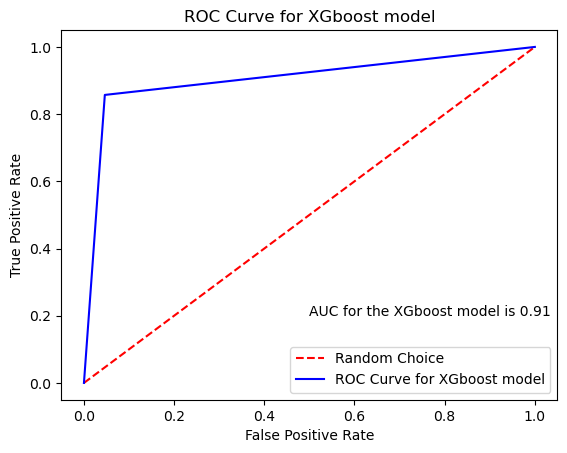

In [65]:
model_build(data_raw_final)

# Part 2: Smoothed Data

Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       108
           1       0.95      0.84      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



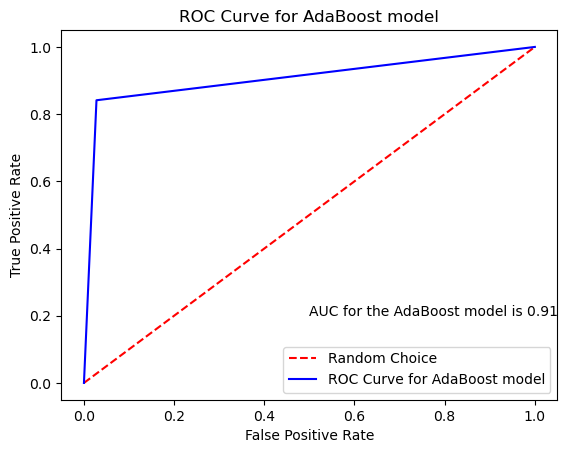

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       108
           1       0.95      0.84      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



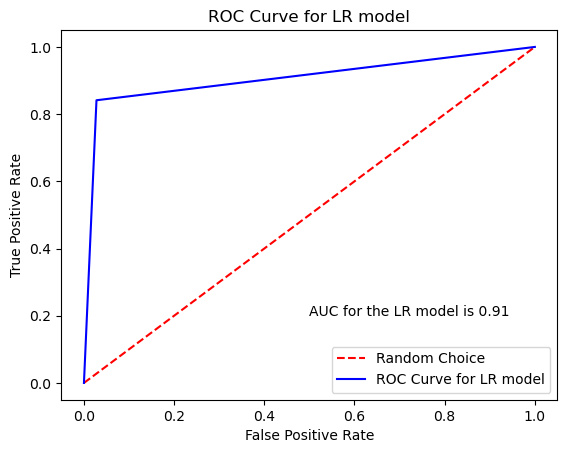

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       108
           1       0.87      0.86      0.86        63

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



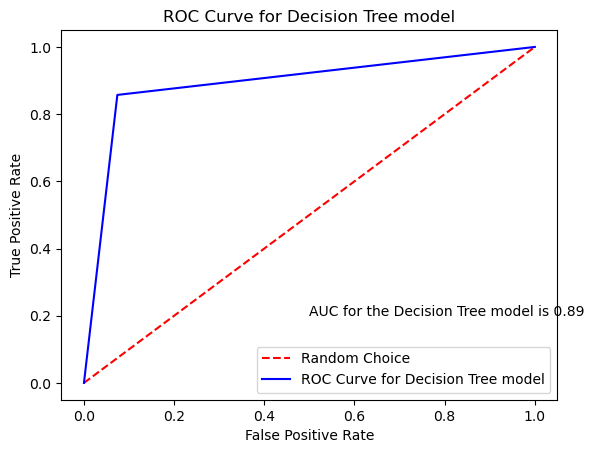

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       108
           1       0.93      0.83      0.87        63

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



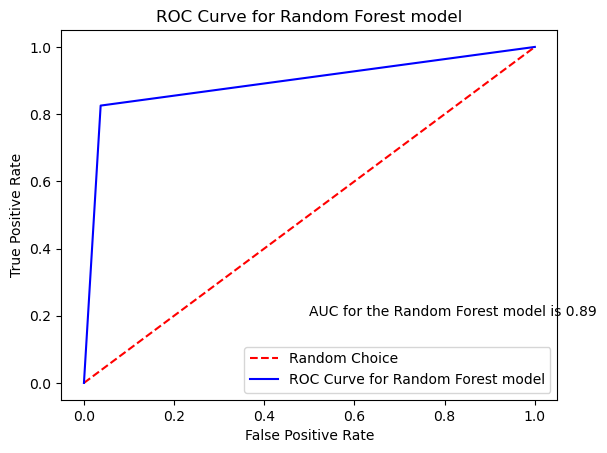

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       108
           1       0.91      0.78      0.84        63

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



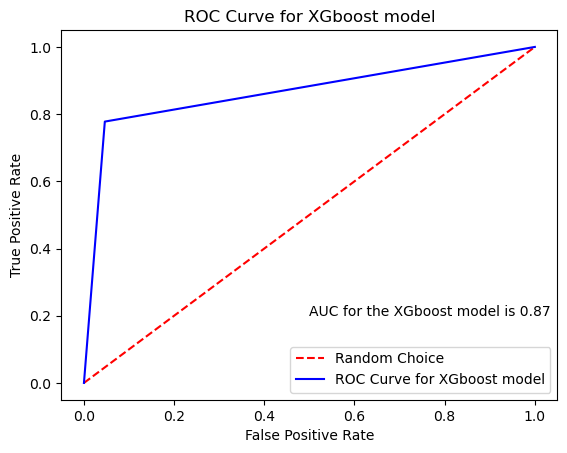

In [67]:
model_build(data_smoothed)

# Part 3 Smote Unsmoothed

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.95      0.95      0.95       102

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



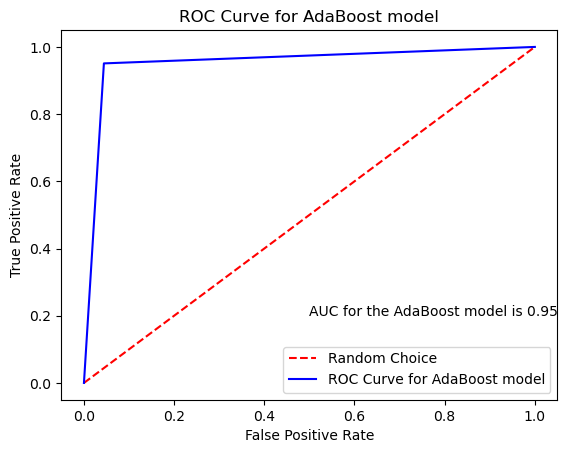

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       113
           1       0.90      0.92      0.91       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



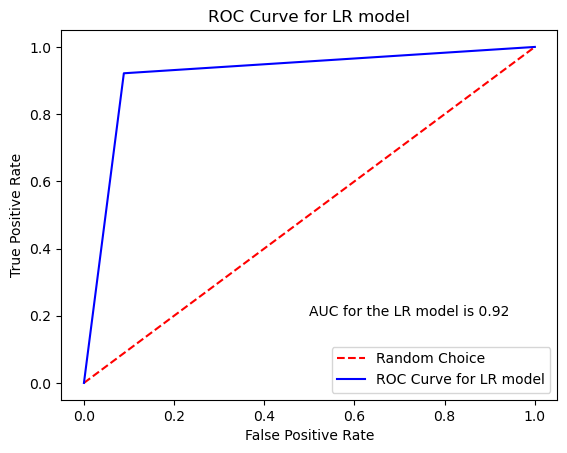

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       113
           1       0.94      0.90      0.92       102

    accuracy                           0.93       215
   macro avg       0.93      0.92      0.93       215
weighted avg       0.93      0.93      0.93       215



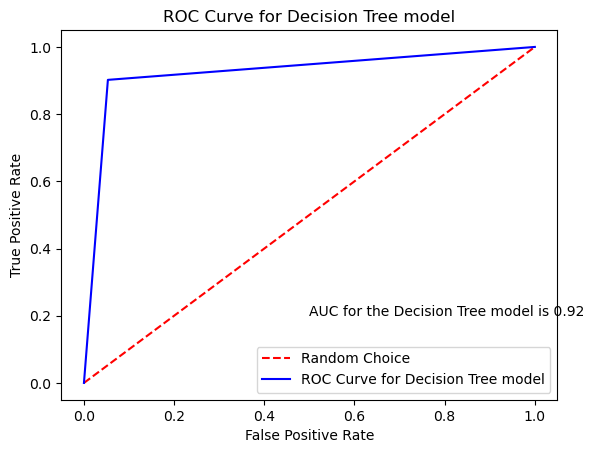

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       113
           1       0.90      0.92      0.91       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



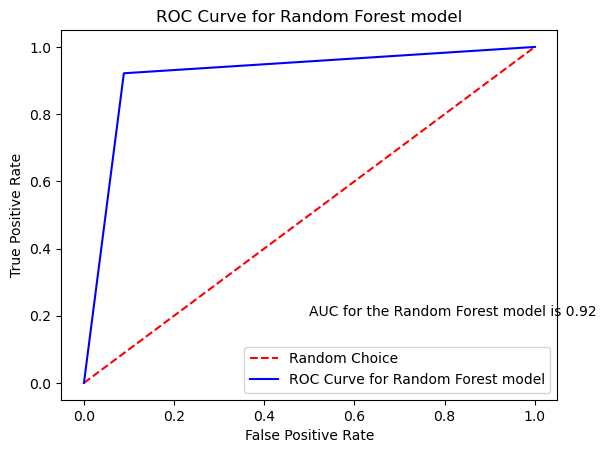

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       113
           1       0.90      0.94      0.92       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



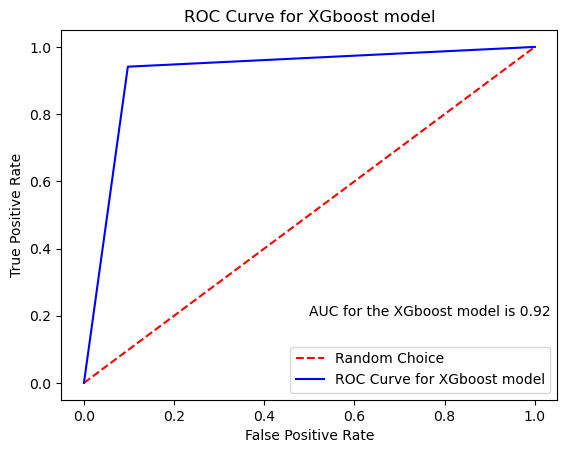

In [69]:
model_build(data_smt)

# Part 4 Smote Smoothed

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       113
           1       0.89      0.92      0.90       102

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



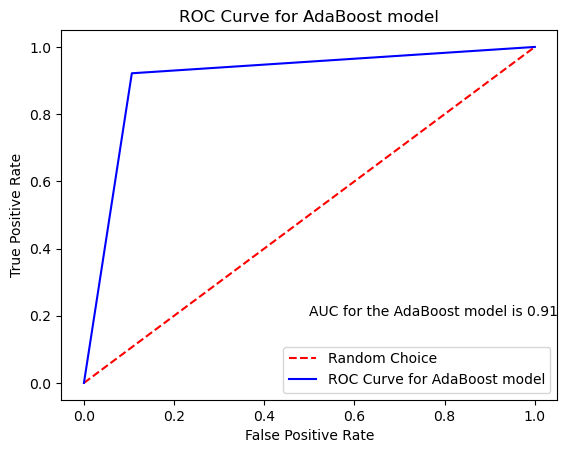

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       113
           1       0.90      0.90      0.90       102

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



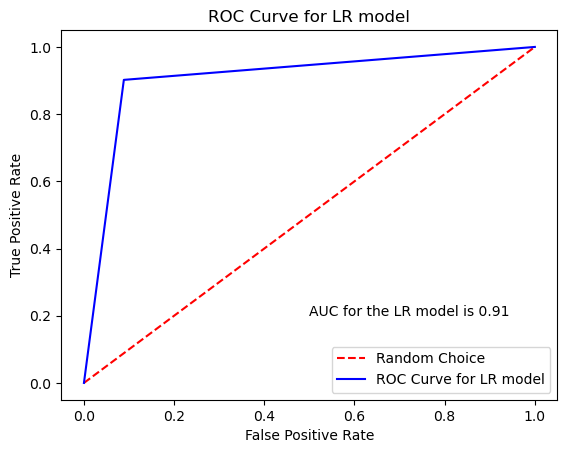

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       113
           1       0.91      0.94      0.92       102

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



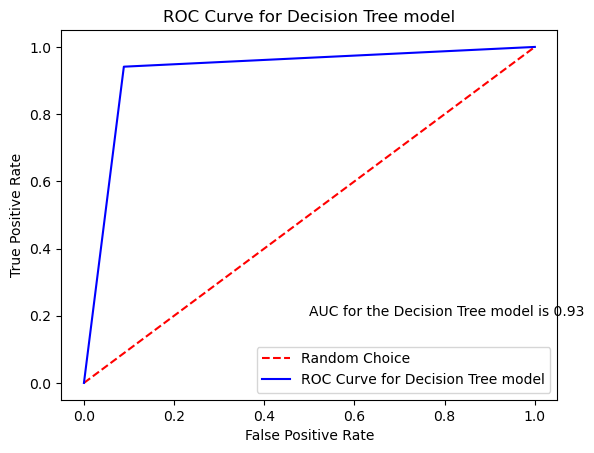

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       113
           1       0.90      0.92      0.91       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



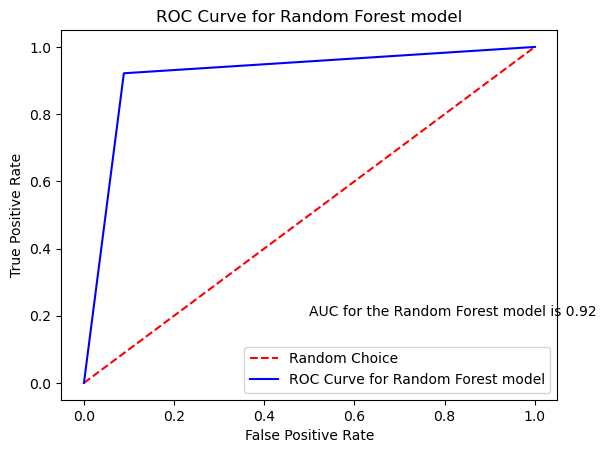

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       113
           1       0.91      0.94      0.93       102

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



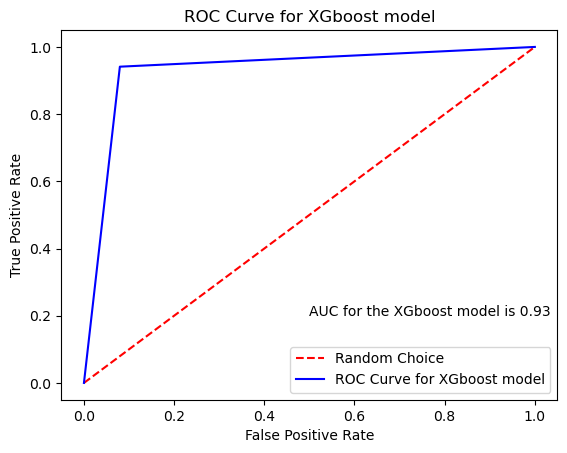

In [71]:
model_build(data_smt_smooth)

# analyzing the two versions, we can clearly infer that the best result is getting from Adaboost using somte data
## now doing the hyperparameter tuning using GridSearchCV
### here we need a function to implement adaboost only here, therefore the other models can be discarded, so defining it as a new function which could genrate the reports of adaboost as previous, its important to note that we are not using the functon for GridSearchCV

## implementing GridSearchCV

In [131]:
# Split the data into features (X) and target (y)
X = data_smt.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data_smt['Diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for AdaBoost (expanded)
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],       # Added more values for boosting rounds
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0,1.1,1.2,1.3,1.4, 1.5,1.6,1.7,1.8,1.9,2]  # Added more values for learning rate
}

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)  # Set random_state here for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 1.1, 'n_estimators': 500}


### here we need a function to implement adaboost only here, therefore the other models can be discarded, so defining it as a new function which could genrate the reports of adaboost as previous, its important to note that we are not using the functon for GridSearchCV

In [112]:
def adamodel(data_inp,learning,n_est,rand):
    # Define features and target variable
    X = data_inp.drop('Diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['Diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    model=AdaBoostClassifier(learning_rate=learning,n_estimators=n_est,random_state=rand)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'The classification by Adaboost model is as follows')
    print(classification_report(y_test,y_pred))
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
    plt.plot(fpr,tpr, label=f'ROC Curve for Adaboost model', color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(.5,.2,f'AUC for the Adaboost model is {auc:.2f}')
    plt.title(f'ROC Curve for Adaboost model')
    plt.legend()
    plt.show()
        

# Initialize AdaBoostClassifier with the best hyperparameters

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       113
           1       0.93      0.95      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



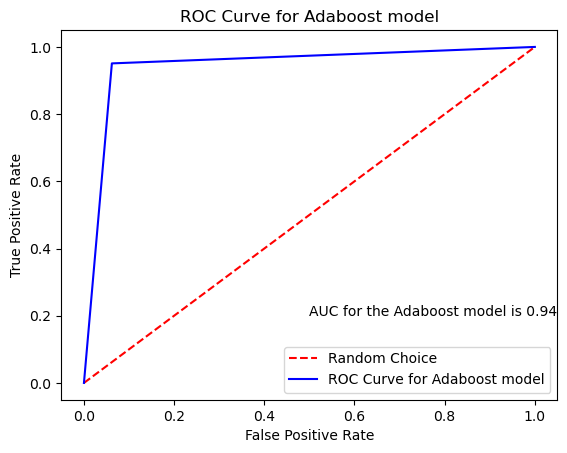

In [114]:
adamodel(data_smt,1.1,500,42)

### after hyper parameter tuning its learned that the performance of the model improved and the, the accuracy is 99 and we got very good accuracy and precesion for the data after smote.

In [120]:
from joblib import dump

# Example AdaBoost model
X = data_smt.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data_smt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = AdaBoostClassifier(learning_rate=1.1,n_estimators=500,random_state=42)
model.fit(X_train, y_train)  # Train your model
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
# Save the model
dump(model, 'adaboost_model.joblib')
print("Model saved as 'adaboost_model.joblib'")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       113
           1       0.93      0.95      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215

Model saved as 'adaboost_model.joblib'


In [202]:
data_vif=data_raw.copy()

In [204]:
data_vif.columns

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [378]:
data_vif_pass=data_vif.drop(['area1','radius1','area2','radius2','radius3','area3','concavity1','concavity2','concavity3','compactness1','compactness2','perimeter3','concave_points1','concave_points2','concave_points3','fractal_dimension3','fractal_dimension2','texture1','texture3','smoothness3'], axis=1).copy()

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example DataFrame (replace with your actual dataset)

# Add constant to the data (intercept term)
X = add_constant(data_vif_pass)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)


               Feature         VIF
0                const  337.743550
1            Diagnosis    3.240835
2           perimeter1    5.290145
3          smoothness1    2.349636
4            symmetry1    2.995382
5   fractal_dimension1    3.821458
6             texture2    1.537587
7           perimeter2    3.104662
8          smoothness2    1.901272
9            symmetry2    2.597828
10        compactness3    3.927063
11           symmetry3    4.749527


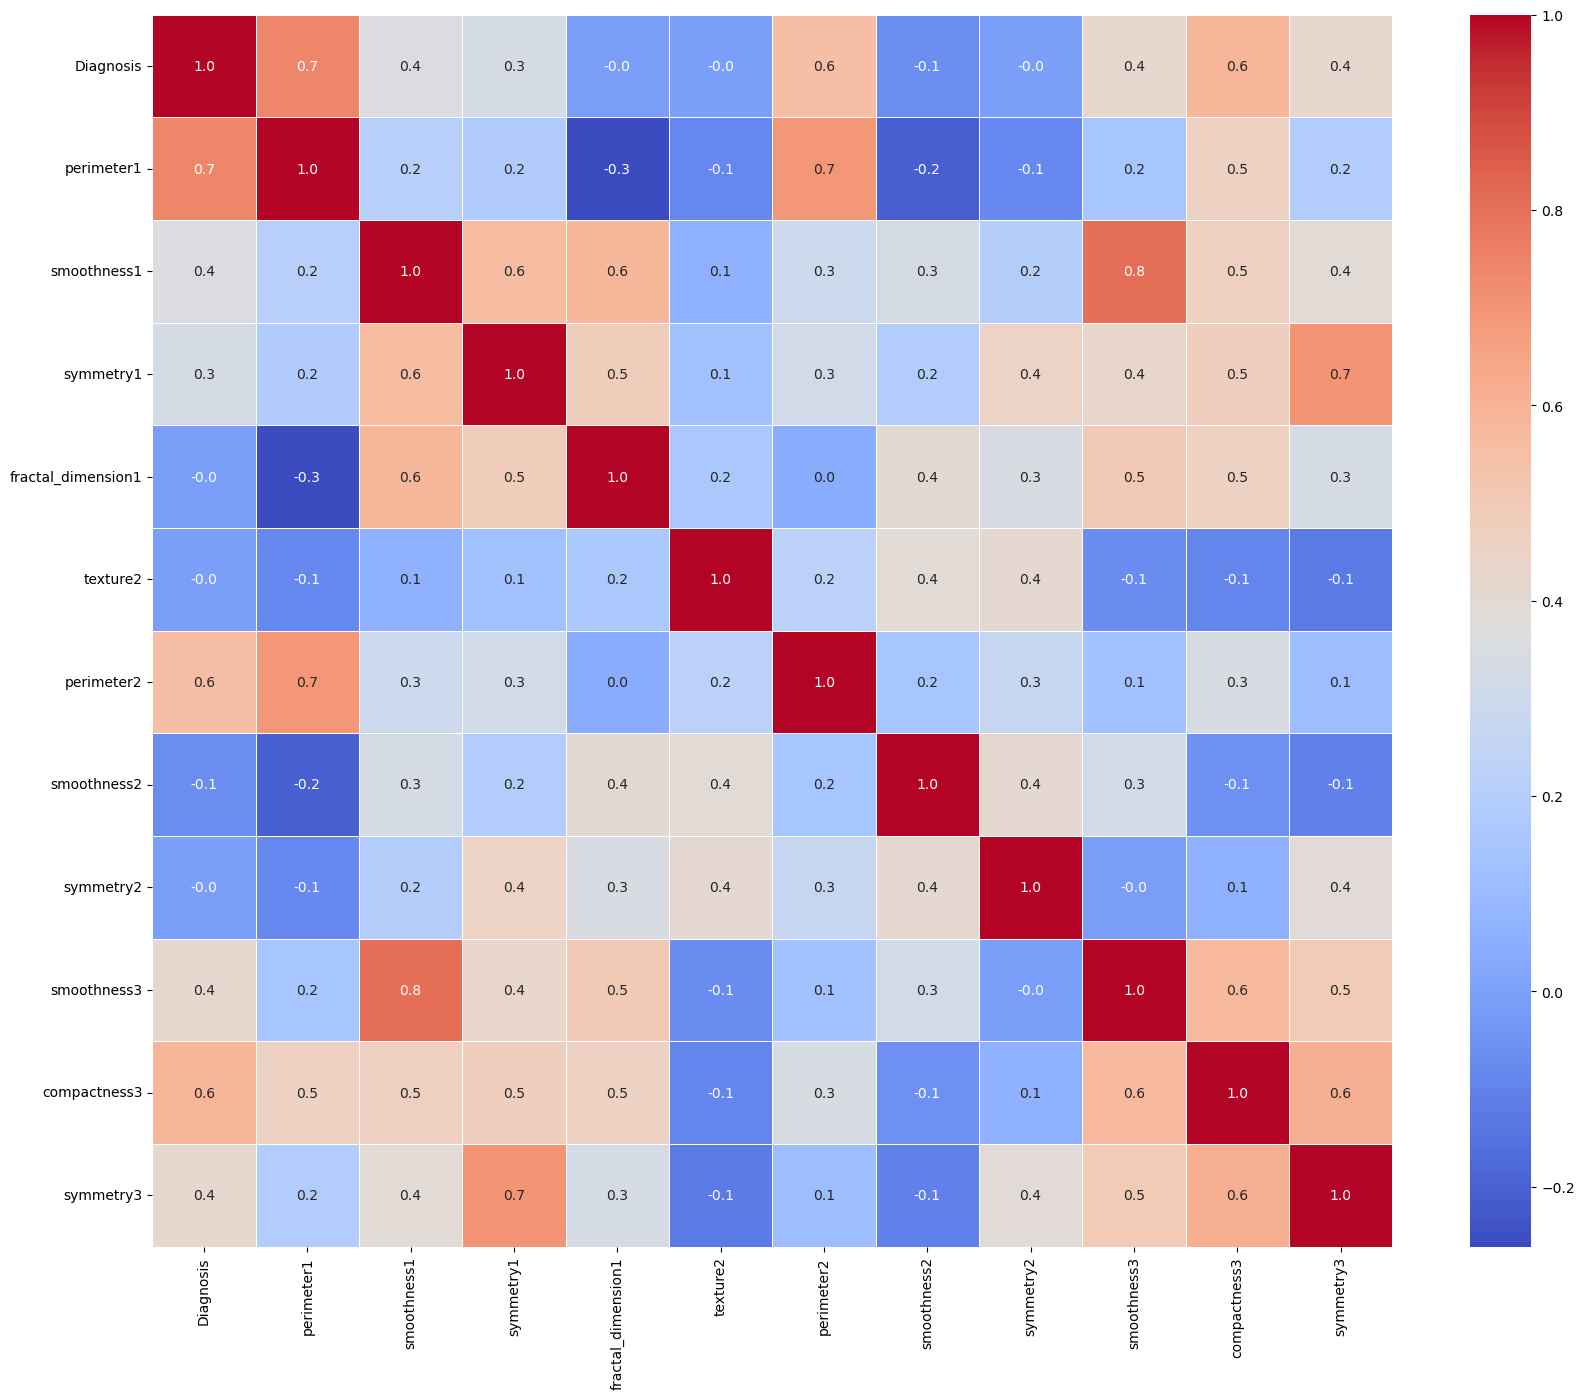

In [370]:
# Assuming 'data_vif_pass' is your DataFrame
plt.figure(figsize=(20, 16))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(data_vif_pass.corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()

Training data shape: (499, 10)
Testing data shape: (215, 10)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.95      0.93      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



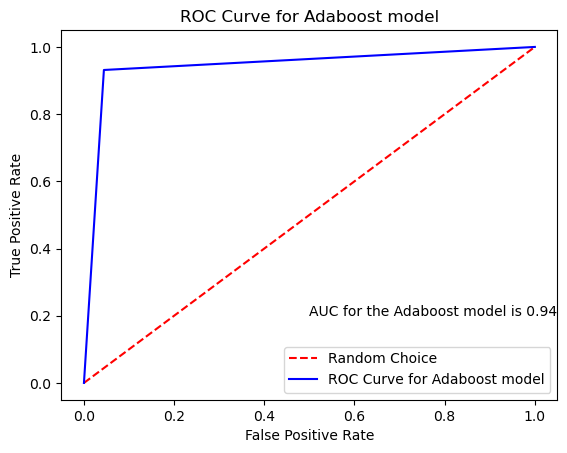

In [118]:
adamodel(data_smt,1.0,300,42)

Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



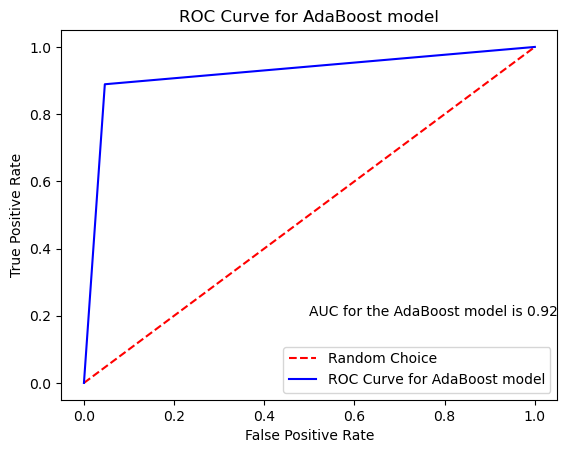

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       108
           1       0.96      0.87      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



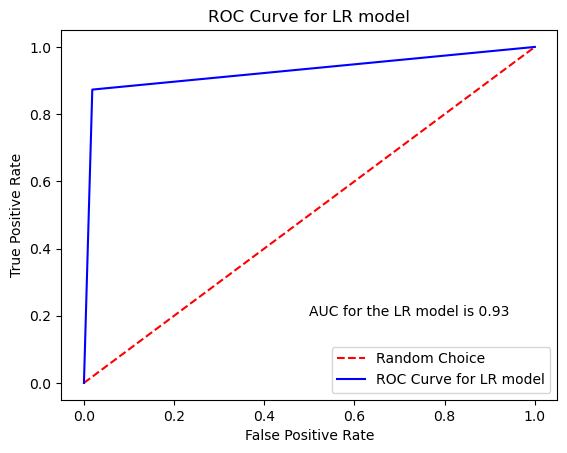

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       108
           1       0.87      0.92      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



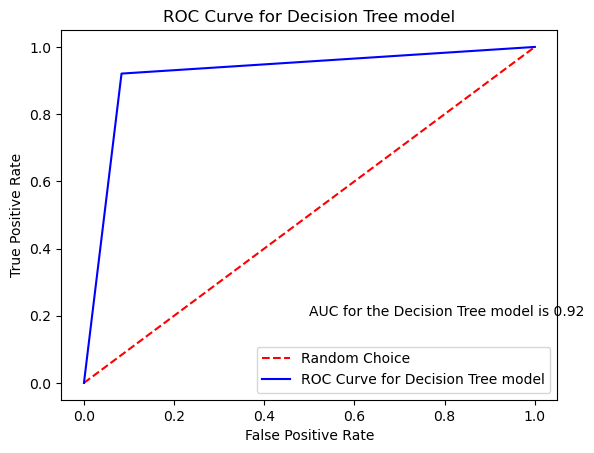

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



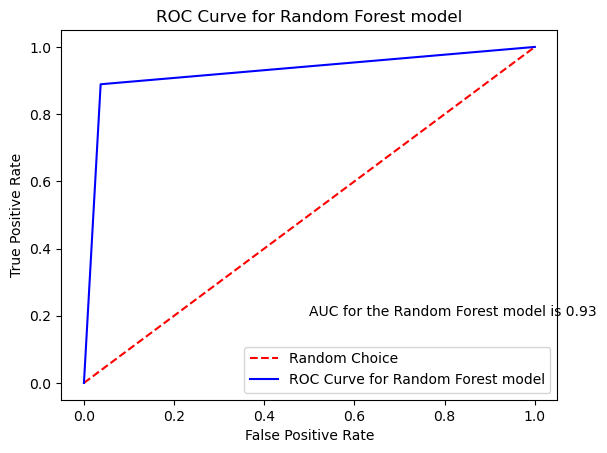

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



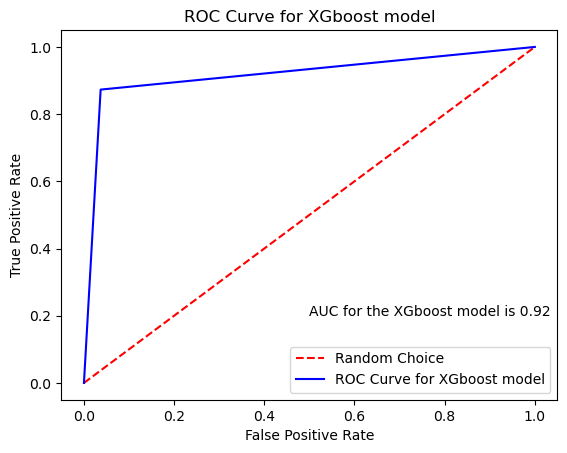

In [342]:
model_build(data_vif_pass)

In [130]:
data_smt.describe().T

,count,mean,std,min,25%,50%,75%,max
perimeter1,714.0,96.601981,25.224634,43.790000,77.551628,91.385306,114.662885,188.50000
smoothness1,714.0,0.097373,0.013557,0.052630,0.087720,0.097245,0.106100,0.16340
symmetry1,714.0,0.183145,0.026582,0.106000,0.164496,0.181450,0.197600,0.30400
fractal_dimension1,714.0,0.062569,0.006977,0.049960,0.057640,0.061326,0.065895,0.09744
texture2,714.0,1.217134,0.521580,0.360200,0.856100,1.150000,1.466750,4.88500
perimeter2,714.0,3.113061,2.049663,0.757000,1.757750,2.553524,3.790000,21.98000
smoothness2,714.0,0.006981,0.002946,0.001713,0.005215,0.006302,0.008071,0.03113
symmetry2,714.0,0.020634,0.008488,0.007882,0.015184,0.018700,0.023322,0.07895
compactness3,714.0,0.273812,0.154840,0.027290,0.162650,0.243350,0.361850,1.05800
symmetry3,714.0,0.296725,0.064152,0.156500,0.255450,0.288350,0.322951,0.66380
